In [1]:

import joblib
import numpy as np
import pandas as pd
from IPython.display import Markdown as md
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
#Load dataset
iris = datasets.load_iris()

In [3]:
# print the label species(setosa, versicolor,virginica)
print("Classes:")
print(iris.target_names)
print()
# print the names of the four features
print("Features:")
print(iris.feature_names)

Classes:
['setosa' 'versicolor' 'virginica']

Features:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [6]:
#Create Random Forest
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [7]:

# Model Accuracy on test data
md(f"## Accuracy on test data: {np.round(metrics.accuracy_score(y_test, y_pred)*100.0,3)}%")

## Accuracy on test data: 93.333%

In [8]:
# save the model
joblib.dump(clf, "./random_forest.joblib")

['./random_forest.joblib']

In [9]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.460420
petal length (cm)    0.444235
sepal length (cm)    0.080697
sepal width (cm)     0.014648
dtype: float64

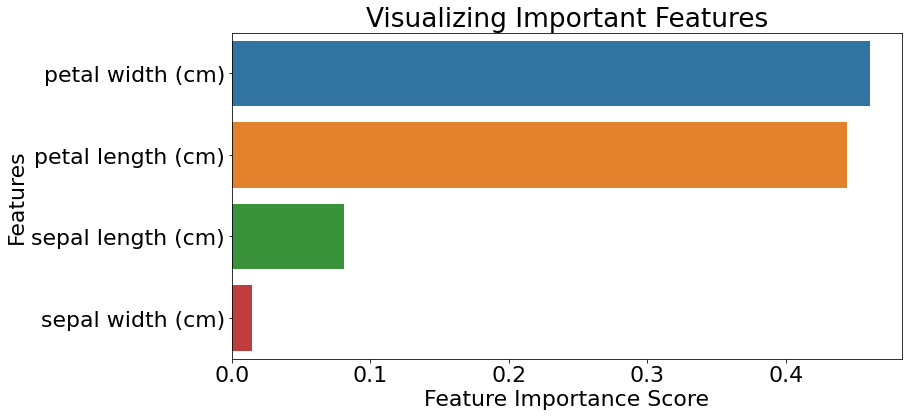

In [10]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 22})
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()